In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import timeit 
from citipy import citipy

In [118]:
# Import time library and datetime module from datetime library
import time 
from datetime import datetime

In [119]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [120]:
# Create a practice set of random latitude and longitude combinations
lats = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
lngs = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
lat_lngs = zip(lats, lngs)

In [121]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [122]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

5

In [123]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [124]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2f3437630fd19a2a1a65630b351b0804


In [125]:
# Create an endpoint URL for a city
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2f3437630fd19a2a1a65630b351b0804&q=Boston


In [126]:
# Make a 'Get' request for the city weather
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [127]:
# Create an endpoint URL for a city
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [128]:
# Create an endpoint URL for a city
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 82.08,
  'feels_like': 81.19,
  'temp_min': 77.29,
  'temp_max': 85.51,
  'pressure': 1008,
  'humidity': 37},
 'visibility': 10000,
 'wind': {'speed': 17.27, 'deg': 260, 'gust': 28.77},
 'clouds': {'all': 75},
 'dt': 1660855382,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1660816482,
  'sunset': 1660866107},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [129]:
# Get the JSON data
boston_data = city_weather.json()

lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 85.51 37 75 17.27


In [130]:
boston_data["sys"]["country"]

'US'

In [131]:
boston_data["dt"]
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-08-18 20:48:18'

In [132]:
# Import the datetime module from the datetime library
from datetime import datetime

# Get the date from the JSON file
date = boston_data["dt"]

# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-08-18 20:43:02'

In [133]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


Pseudocode to map out how to get weather data for each city for the website:
1. Import dependencies and initialized counters and an empty list that will hold the weather data
2. Loop through the cities list
3. Group the cities in sets of 50 to log the process as we find the weather data for each city
    - 2 counters will be needed: one to log the city count from 1 to 50, and another for the sets
4. Build the city_url or endpoint for each city
5. Log the URL and the record and set numbers
6. Make an API request for each city
7. Parse the JSON weather data for the following:
    - city, country, and date
    - latitutde and longitude
    - maximum temperature
    - humidity
    - cloudiness
    - wind speed
8. Add the data to a list in a dictionary format and then convert the list to a DataFrame

In [134]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [135]:
# Loop through all the cities in the list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1

# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | cockburn town
Processing Record 2 of Set 1 | gat
Processing Record 3 of Set 1 | parvatsar
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | saint george
-----------------------------
Data Retrieval Complete      
-----------------------------


In [136]:
# Create a DF of City Weather Data

# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cockburn Town,21.4612,-71.1419,85.96,70,40,13.80,TC,2022-08-18 20:54:25
1,Gat,31.6100,34.7642,77.81,73,0,0.69,IL,2022-08-18 20:51:01
2,Parvatsar,26.8833,74.7667,76.10,90,1,7.94,IN,2022-08-18 20:54:25
3,Punta Arenas,-53.1500,-70.9167,42.91,65,100,13.80,CL,2022-08-18 20:47:26
4,Saint George,37.1041,-113.5841,83.43,59,75,9.22,US,2022-08-18 20:50:18


In [137]:
city_column_names = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df.reindex(columns=city_column_names)
city_data_df.head(20)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cockburn Town,TC,2022-08-18 20:54:25,21.4612,-71.1419,85.96,70,40,13.80
1,Gat,IL,2022-08-18 20:51:01,31.6100,34.7642,77.81,73,0,0.69
2,Parvatsar,IN,2022-08-18 20:54:25,26.8833,74.7667,76.10,90,1,7.94
3,Punta Arenas,CL,2022-08-18 20:47:26,-53.1500,-70.9167,42.91,65,100,13.80
4,Saint George,US,2022-08-18 20:50:18,37.1041,-113.5841,83.43,59,75,9.22


In [138]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [139]:
import matplotlib.pyplot as plt

In [140]:
# Extract relevant fields from the DataFrame for plottings
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

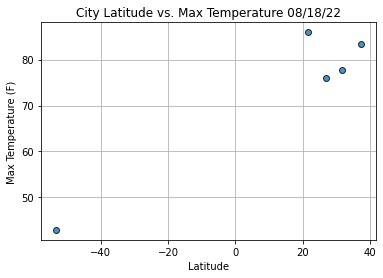

In [141]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

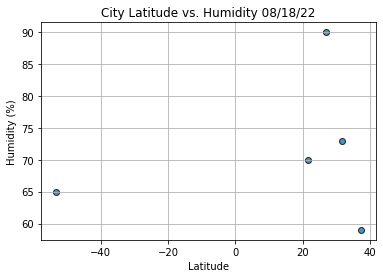

In [142]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

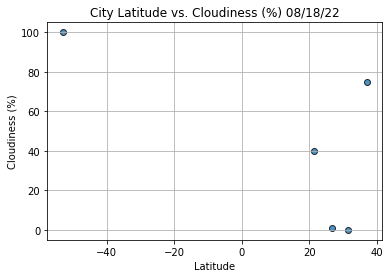

In [143]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

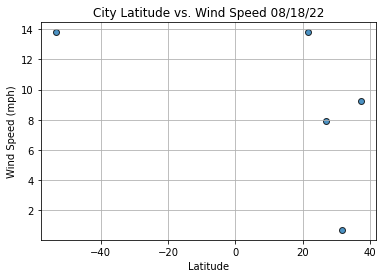

In [144]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()